
# M.¬™ de los √Ångeles Mart√≠n de la Cruz.

# Actividad 3.5 ‚Äì Clasificaci√≥n de vinos (red-wine)

## 1. Importaci√≥n de los datasets

### Descargar y Extraer el archivo ZIP desde GitHub

Descargamos el archivo ZIP desde GitHub.
Lo descomprimimos en una carpeta llamada "dataset_wine".
Listamos los archivos extra√≠dos para asegurarnos de que el CSV est√° ah√≠.

In [2]:
import requests
import zipfile
import io

# URL del archivo ZIP en GitHub (obtener el enlace "Raw", cambiamos blob por raw)
zip_url = "https://github.com/sntamaria/Actividad-3.5-Clasificaci-n-de-vinos-/raw/main/wine%2Bquality.zip"

# Descargar el archivo ZIP
response = requests.get(zip_url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Extraer todos los archivos en una carpeta temporal
zip_file.extractall("dataset_wine")

# Listar los archivos extra√≠dos
import os
print(os.listdir("dataset_wine"))


['winequality-red.csv', 'winequality.names', 'winequality-white.csv']


### Cargar el CSV de vinos tintos

In [3]:
import pandas as pd

# Cargar el archivo CSV con el separador correcto (por defecto asume que es una coma, por eso hay que indicarlo)
df = pd.read_csv("dataset_wine/winequality-red.csv", sep=";")

# Comprobamos las columnas y tipos de datos
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         

### Limpieza y preparaci√≥n del dataset

#### Comprobamos si hay valores nulos:

In [4]:
# Comprobar si hay valores nulos
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Si hay muchos valores nulos en una columna se podr√≠a eliminar la columna, si hay pocos se remplazar√≠an con la media, la moda, la mediana o alg√∫n otro valor.

En este caso vemos que no hay valores nulos en el dataset.

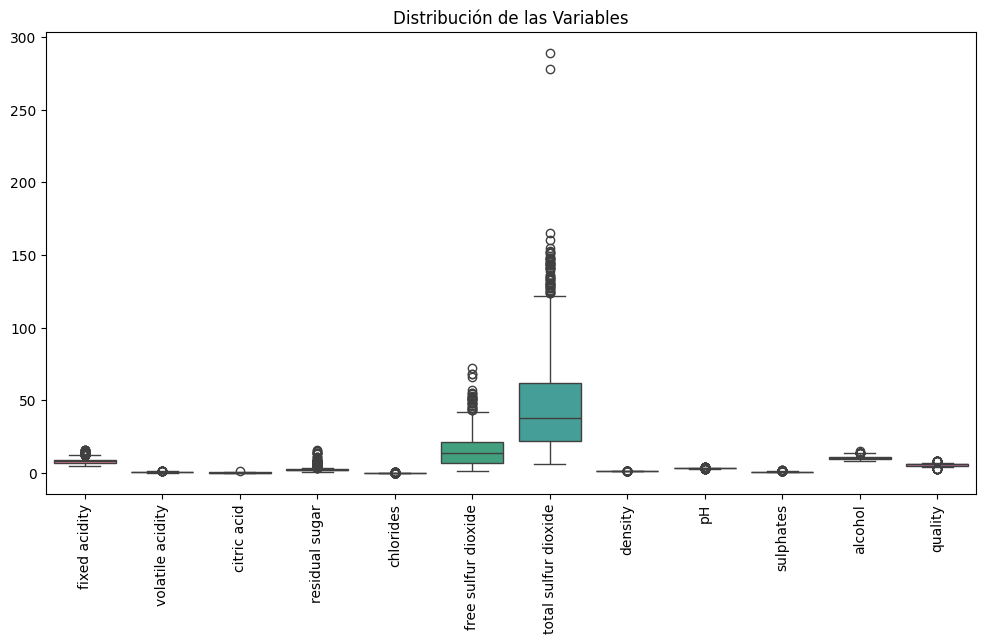

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Distribuci√≥n de las Variables")
plt.show()


- "free sulfur dioxide" y "total sulfur dioxide" tienen muchos valores at√≠picos con valores elevados.
- Otras variables tambi√©n presentan algunos outliers, pero en menor medida.
- La escala de las variables es muy diferente, lo que refuerza la necesidad de normalizaci√≥n o estandarizaci√≥n.

#### Tratar los valores at√≠picos

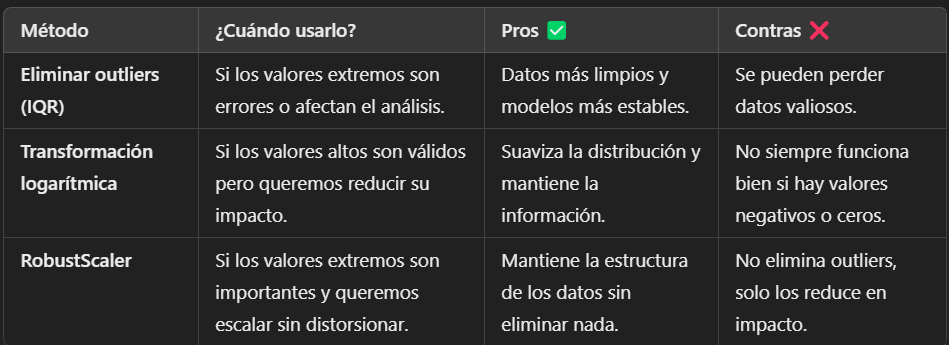



- Si los valores extremos parecen errores o ruido en los datos ‚Üí Los eliminamos (IQR).
- Si son datos v√°lidos y solo quieremos reducir su efecto ‚Üí Usamos transformaci√≥n logar√≠tmica.
- Si quieremos conservar todos los datos pero escalarlos correctamente ‚Üí Usamos RobustScaler.

##### Analizar que m√©todo nos viene mejor

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("dataset_wine/winequality-red.csv", sep=";")

# Copia del dataset original
df_original = df.copy()

# Separar features y target
X = df.drop(columns=["quality"])
y = df["quality"]

# ---- M√âTODO 1: ELIMINACI√ìN DE OUTLIERS (IQR) ----
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
df_iqr = df[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
X_iqr = df_iqr.drop(columns=["quality"])
y_iqr = df_iqr["quality"]

# ---- M√âTODO 2: TRANSFORMACI√ìN LOGAR√çTMICA ----
#df_log = df.copy()
#X_log = np.log1p(X)  # log(1+x) para evitar log(0)
#y_log = y.copy()

# ---- M√âTODO 3: NORMALIZACI√ìN CON RobustScaler ----
#scaler = RobustScaler()
#X_robust = scaler.fit_transform(X)
#y_robust = y.copy()

# Funci√≥n para entrenar modelo y evaluar
#def evaluar_modelo(X, y, metodo):
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #modelo = LinearRegression()
    #modelo.fit(X_train, y_train)
    #y_pred = modelo.predict(X_test)

    #rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    #r2 = r2_score(y_test, y_pred)

    #print(f"\nResultados para {metodo}:")
    #print(f"üîπ RMSE: {rmse:.4f}")
    #print(f"üîπ R¬≤: {r2:.4f}")

# Evaluar cada m√©todo
#evaluar_modelo(X_iqr, y_iqr, "IQR (sin outliers)")
#evaluar_modelo(X_log, y_log, "Transformaci√≥n Logar√≠tmica")
#evaluar_modelo(X_robust, y_robust, "RobustScaler")


La eliminaci√≥n de outliers en este caso es mejor.

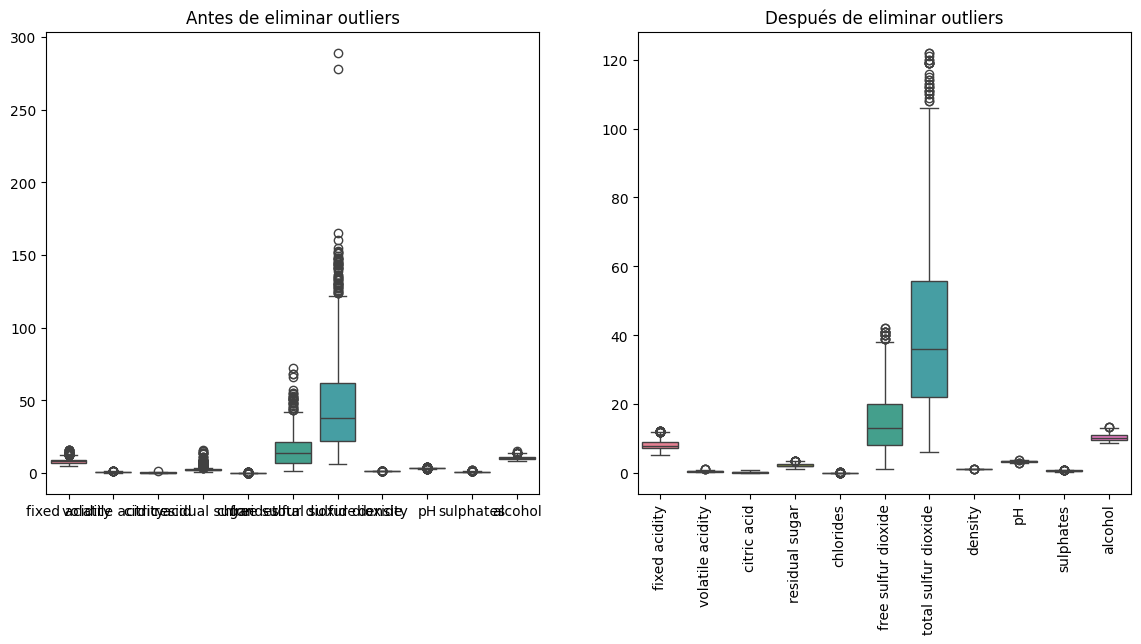

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=X, ax=axes[0])
axes[0].set_title("Antes de eliminar outliers")

sns.boxplot(data=X_iqr, ax=axes[1])
axes[1].set_title("Despu√©s de eliminar outliers")

plt.xticks(rotation=90)
plt.show()


Resultados para IQR (sin outliers):
- RMSE: 0.5763
- R¬≤: 0.4230

Resultados para Transformaci√≥n Logar√≠tmica:
- RMSE: 0.6230
- R¬≤: 0.4061

Resultados para RobustScaler:
- RMSE: 0.6245
- R¬≤: 0.4032

- Eliminar outliers con IQR es la mejor opci√≥n en este caso, porque tiene el RMSE m√°s bajo (menos error) y el R¬≤ m√°s alto (explica m√°s la varianza).
- Las transformaciones Log y RobustScaler no mejoran el rendimiento y hasta lo empeoran un poco.
- La diferencia no es enorme, pero el m√©todo IQR se destaca.

## 2.  Mostrar la matriz de correlaci√≥n de variables

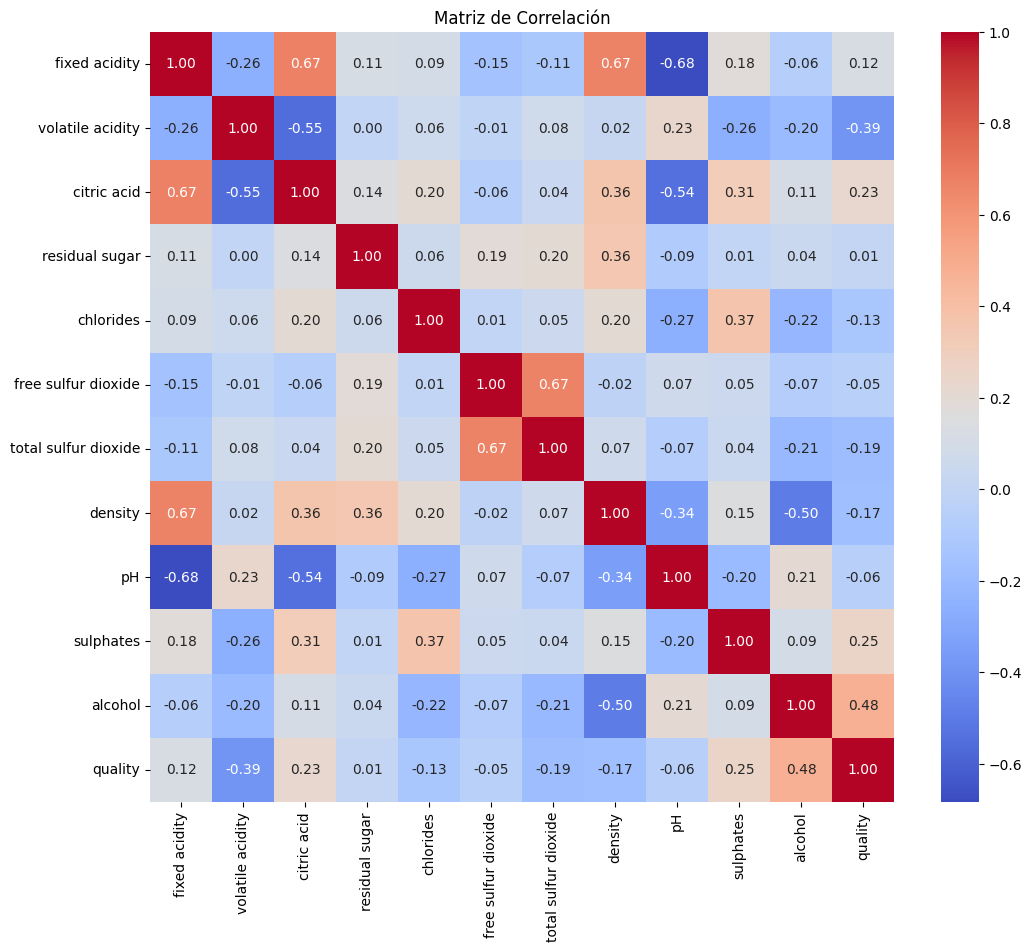

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaci√≥n")
plt.show()


## 3. Otra t√©cnica de selecci√≥n de caracter√≠sticas

#### SelectKBest:

Aqu√≠ usamos SelectKBest con ANOVA F-value (porque la variable objetivo "quality" es categ√≥rica):

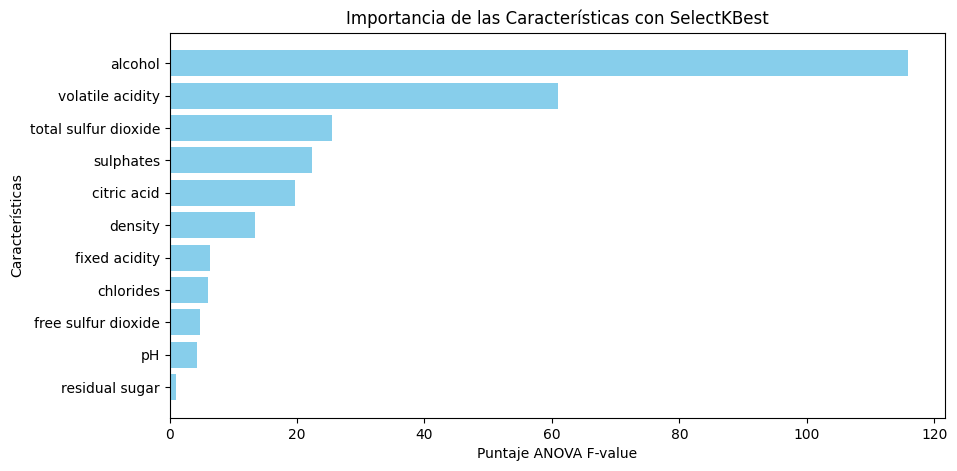

Top 5 Caracter√≠sticas Seleccionadas con SelectKBest:
                Feature  Importance
0               alcohol  115.854797
1      volatile acidity   60.913993
2  total sulfur dioxide   25.478510
3             sulphates   22.273376
4           citric acid   19.690664


In [9]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = df.drop("quality", axis=1)
y = df["quality"]

# Aplicar SelectKBest con ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=5)  # Seleccionamos las 5 mejores caracter√≠sticas
X_new = selector.fit_transform(X, y)

# Obtener los puntajes de importancia
scores = selector.scores_

# Ordenar las caracter√≠sticas seg√∫n su puntaje
sorted_idx = np.argsort(scores)[::-1]  # Ordenamos de mayor a menor

# Graficar la importancia de las caracter√≠sticas
plt.figure(figsize=(10, 5))
plt.barh(X.columns[sorted_idx], scores[sorted_idx], color='skyblue')
plt.xlabel("Puntaje ANOVA F-value")
plt.ylabel("Caracter√≠sticas")
plt.title("Importancia de las Caracter√≠sticas con SelectKBest")
plt.gca().invert_yaxis()  # Para que la caracter√≠stica m√°s importante est√© en la parte superior
plt.show()

# Crear un DataFrame con las caracter√≠sticas seleccionadas y sus puntajes
top_features = pd.DataFrame({
    'Feature': X.columns[sorted_idx][:5],
    'Importance': scores[sorted_idx][:5]
})

# Mostrar la tabla de las caracter√≠sticas seleccionadas
print("Top 5 Caracter√≠sticas Seleccionadas con SelectKBest:")
print(top_features)




- Chi-cuadrado se usa cuando las caracter√≠sticas son categ√≥ricas (no es nuestro caso).
- ANOVA F-value mide la relaci√≥n entre cada variable independiente y la variable objetivo "quality", siendo m√°s adecuado aqu√≠.

Esto nos ayuda a elegir solo las caracter√≠sticas m√°s importantes y evitar ruido en el modelo.

#### Eliminaci√≥n Recursiva de Caracter√≠sticas (RFE):

Otra t√©cnica m√°s robusta es Recursive Feature Elimination (RFE), que elimina caracter√≠sticas menos importantes usando un modelo base.

Top 5 caracter√≠sticas seleccionadas por RFE:
Index(['fixed acidity', 'volatile acidity', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')
Top 5 Caracter√≠sticas Seleccionadas por RFE con su Importancia:
                Feature  Importance
7               alcohol    0.151698
6             sulphates    0.112402
3  total sulfur dioxide    0.103722
1      volatile acidity    0.100606
4               density    0.088905
2             chlorides    0.078535
0         fixed acidity    0.075535
5                    pH    0.075392


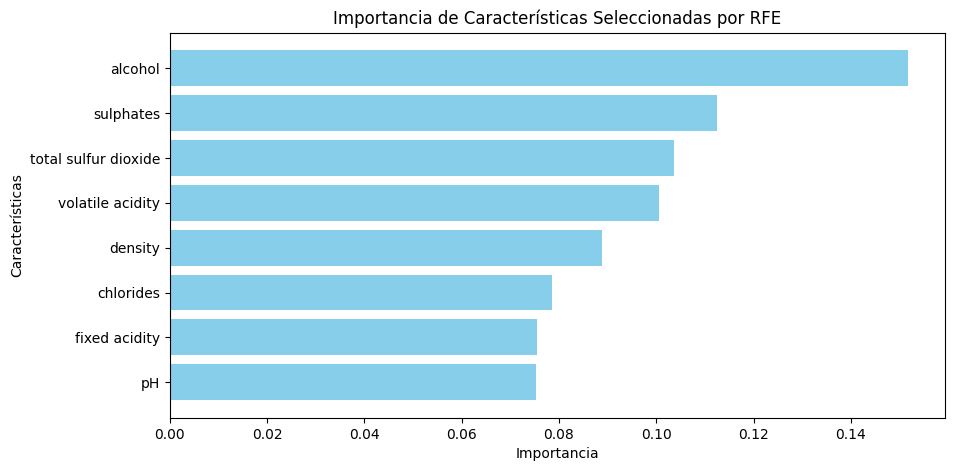

In [10]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Dividir los datos en caracter√≠sticas (X) y variable objetivo (y)
X = df.drop("quality", axis=1)
y = df["quality"]

# Usamos un RandomForestClassifier como estimador base
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Aplicar RFE para seleccionar las 5 mejores caracter√≠sticas
selector_rfe = RFE(estimator=model, n_features_to_select=8)
X_new = selector_rfe.fit_transform(X, y)

# Obtener nombres de las caracter√≠sticas seleccionadas
selected_features = X.columns[selector_rfe.support_]

# Mostrar las caracter√≠sticas seleccionadas
print("Top 5 caracter√≠sticas seleccionadas por RFE:")
print(selected_features)

# Obtener las importancias de las caracter√≠sticas desde el modelo de Random Forest
feature_importances = model.feature_importances_

# Filtrar solo las importancias de las caracter√≠sticas seleccionadas
selected_importances = feature_importances[selector_rfe.support_]

# Crear un DataFrame con los resultados
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': selected_importances
}).sort_values(by='Importance', ascending=False)  # Ordenar de mayor a menor importancia

# Mostrar el DataFrame con las caracter√≠sticas seleccionadas y su importancia
print("Top 5 Caracter√≠sticas Seleccionadas por RFE con su Importancia:")
print(feature_importance_df)

# Graficar la importancia de las caracter√≠sticas seleccionadas
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Caracter√≠sticas")
plt.title("Importancia de Caracter√≠sticas Seleccionadas por RFE")
plt.gca().invert_yaxis()  # Para que la m√°s importante aparezca arriba
plt.show()



- El dataset tiene relaciones no lineales
 - SelectKBest con ANOVA F-value solo detecta relaciones lineales entre cada variable y la variable objetivo (quality).
 - RFE con RandomForest eval√∫a interacciones complejas y no lineales entre variables, lo que es crucial para un dataset como este.

- Las caracter√≠sticas est√°n altamente correlacionadas
 - Algunas variables en el dataset tienen alta correlaci√≥n (ej., total sulfur dioxide vs. free sulfur dioxide).
 - RFE ayuda a eliminar variables redundantes y dependientes, mientras que SelectKBest selecciona caracter√≠sticas sin considerar su redundancia.

- RandomForest maneja mejor los valores discretos de 'quality'
 - Quality es una variable ordinal (3-8), por lo que un modelo basado en √°rboles maneja mejor este tipo de datos que un m√©todo estad√≠stico puro como ANOVA F-value.

 Si el dataset fuera muy grande, podr√≠amos considerar PCA para reducir la dimensionalidad, pero en este caso RFE es m√°s efectivo.

## 4. Realizar una comparativa de la precisi√≥n en el entrenamiento de los diferentes modelos de NaivaBayes y KNN, aplicando Cross Validation.

Para esta comparativa s√≥lo vamos a usar GaussianNB ya que los dem√°s modelos dieron peores resultados.  


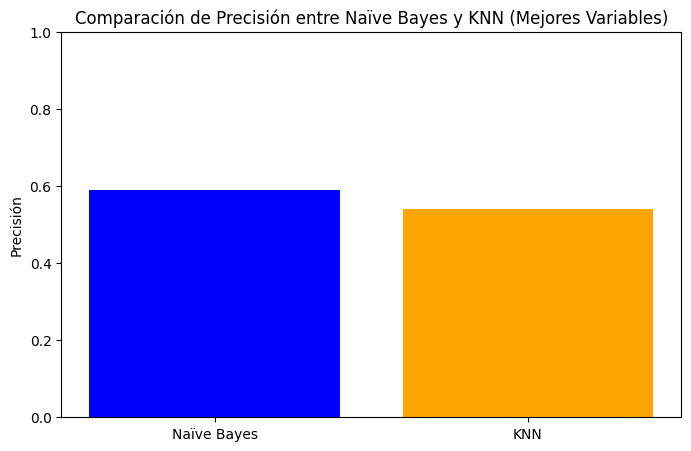

Na√Øve Bayes Accuracy: 0.5903616352201257
KNN Accuracy: 0.5409709119496855


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Dividir los datos en caracter√≠sticas (X) y variable objetivo (y)
X = df.drop("quality", axis=1)
y = df["quality"]

# Definir las mejores caracter√≠sticas seg√∫n RFE
#selected_features = ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'fixed acidity', 'chlorides', 'pH']
selected_features = ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']

# Utilizar solo las caracter√≠sticas seleccionadas
X_selected = X[selected_features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Definir los modelos
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=5)

# Aplicar validaci√≥n cruzada
nb_scores = cross_val_score(nb_model, X_scaled, y, cv=10, scoring='accuracy')
knn_scores = cross_val_score(knn_model, X_scaled, y, cv=10, scoring='accuracy')

# Calcular la media de precisi√≥n
nb_mean = np.mean(nb_scores)
knn_mean = np.mean(knn_scores)

# Crear gr√°fico de comparaci√≥n
models = ['Na√Øve Bayes', 'KNN']
accuracies = [nb_mean, knn_mean]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Precisi√≥n')
plt.title('Comparaci√≥n de Precisi√≥n entre Na√Øve Bayes y KNN (Mejores Variables)')
plt.show()

# Imprimir resultados
print("Na√Øve Bayes Accuracy:", nb_mean)
print("KNN Accuracy:", knn_mean)



## 5. Con el modelo Guissian de Naive Bayes

### 5.1. Entrenarlo y obtener la matriz de confusi√≥n

Cross-Validation Accuracy Scores: [0.578125   0.578125   0.628125   0.584375   0.61128527]
Mean Accuracy: 0.596007053291536
Standard Deviation: 0.020198151509173704

Test Set Accuracy: 0.55625

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.64      0.74      0.68       130
           6       0.53      0.55      0.54       132
           7       0.34      0.24      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.25      0.25      0.25       320
weighted avg       0.52      0.56      0.54       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


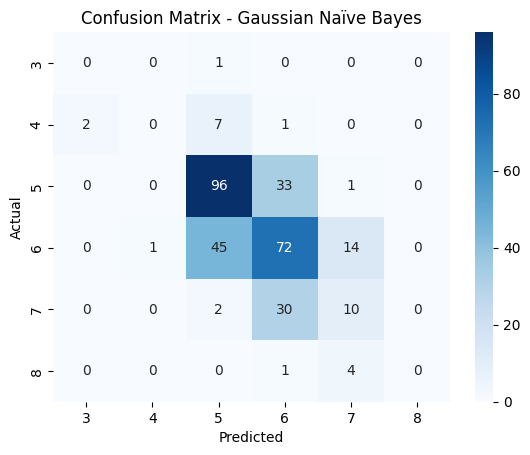

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir las mejores caracter√≠sticas seg√∫n RFE
selected_features = ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']

# Utilizar solo las caracter√≠sticas seleccionadas
X_selected = X[selected_features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el modelo GaussianNB
nb_model = GaussianNB()

# Validaci√≥n cruzada
cv_scores = cross_val_score(nb_model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Entrenar el modelo con el conjunto de entrenamiento
nb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = nb_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian Na√Øve Bayes')
plt.show()


1. Validaci√≥n cruzada
Cross-Validation Accuracy Scores: [0.5781, 0.5781, 0.6281, 0.5843, 0.6113]
Media de precisi√≥n (Mean Accuracy): 0.5960 (‚âà 59.6%)
Desviaci√≥n est√°ndar: 0.0202 (‚âà 2%)
Esto indica que, en promedio, el modelo Na√Øve Bayes tiene una precisi√≥n del 59.6% en la validaci√≥n cruzada con una variaci√≥n baja entre las pruebas.

2. Precisi√≥n en el conjunto de prueba
Test Set Accuracy: 0.5562 (‚âà 55.6%)
Esto significa que el modelo tiene un desempe√±o ligeramente peor en los datos de prueba que en la validaci√≥n cruzada.

3. Informe de clasificaci√≥n (Classification Report)
- Clase "5" (mayor√≠a de datos):

  - Precisi√≥n (Precision): 0.64
 - Recall: 0.74
 - F1-score: 0.68
- ‚Üí El modelo predice bien esta clase.


- Clase "6":
 - Precisi√≥n: 0.53
 - Recall: 0.55
 - F1-score: 0.54
- ‚Üí Regular desempe√±o.

Otras clases (3, 4, 7, 8) tienen precisi√≥n 0.00 porque el modelo no predijo ejemplos para esas clases.


El Warning en precision indica que algunas clases no tienen predicciones, lo cual sugiere que Na√Øve Bayes no maneja bien la distribuci√≥n de los datos en este caso.

#### Ajustar el modelo Na√Øve Bayes con var_smoothing para mejor manejo de probabilidades peque√±as.

Cross-Validation Accuracy Scores: [0.54375    0.55625    0.61875    0.565625   0.60501567]
Mean Accuracy: 0.5778781347962382
Standard Deviation: 0.028946849604123

Test Set Accuracy: 0.5625

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.10      0.14        10
           5       0.64      0.76      0.70       130
           6       0.54      0.53      0.53       132
           7       0.32      0.24      0.27        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.29      0.27      0.27       320
weighted avg       0.53      0.56      0.54       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


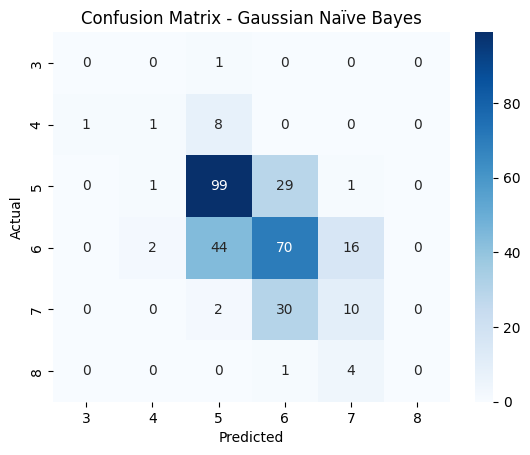

In [13]:
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir las mejores caracter√≠sticas seg√∫n RFE
selected_features = ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']

# Utilizar solo las caracter√≠sticas seleccionadas
X_selected = X[selected_features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el modelo GaussianNB con ajuste de var_smoothing
nb_model = GaussianNB(var_smoothing=1e-3)

# Validaci√≥n cruzada
cv_scores = cross_val_score(nb_model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Entrenar el modelo con el conjunto de entrenamiento
nb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = nb_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian Na√Øve Bayes')
plt.show()
"""

No resulta en este caso, habr√° que probar con otro modelo diferente.

#### Rebalanceo de clases (SMOTE, sobremuestreo/submuestreo)

Voy a implementar el rebalanceo de clases utilizando SMOTE (Synthetic Minority Over-sampling Technique) para aumentar la cantidad de datos en las clases minoritarias antes de entrenar el modelo.

Cross-Validation Accuracy Scores: [0.51376147 0.49541284 0.53058104 0.46330275 0.51529052]
Mean Accuracy: 0.5036697247706422
Standard Deviation: 0.023059807365760056

Test Set Accuracy: 0.353125

Classification Report:
               precision    recall  f1-score   support

           3       0.02      0.50      0.04         2
           4       0.03      0.09      0.04        11
           5       0.67      0.38      0.49       136
           6       0.51      0.30      0.38       128
           7       0.35      0.47      0.40        40
           8       0.04      0.33      0.06         3

    accuracy                           0.35       320
   macro avg       0.27      0.35      0.24       320
weighted avg       0.53      0.35      0.41       320



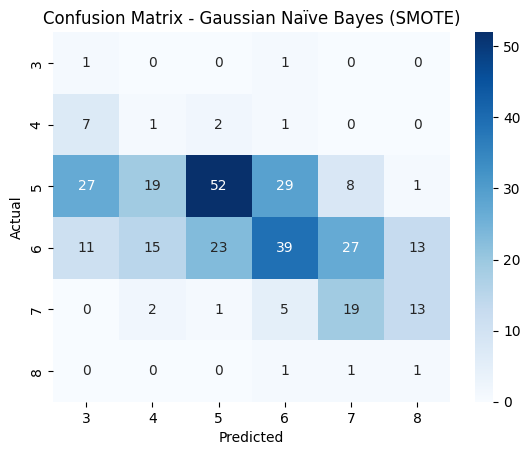

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Definir las mejores caracter√≠sticas seg√∫n RFE
selected_features = ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']

# Utilizar solo las caracter√≠sticas seleccionadas
X_selected = X[selected_features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Definir el modelo GaussianNB con ajuste de var_smoothing
nb_model = GaussianNB(var_smoothing=1e-3)

# Validaci√≥n cruzada
cv_scores = cross_val_score(nb_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

# Entrenar el modelo con el conjunto de entrenamiento balanceado
nb_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones
y_pred = nb_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian Na√Øve Bayes (SMOTE)')
plt.show()


#### KNN

KNN - Cross-Validation Accuracy Scores: [0.6171875  0.5859375  0.62890625 0.57421875 0.57647059]
KNN - Mean Accuracy: 0.5965441176470587
KNN - Standard Deviation: 0.022303927039565165

KNN - Test Set Accuracy: 0.609375

KNN - Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.09      0.17        11
           5       0.66      0.74      0.70       136
           6       0.57      0.62      0.59       128
           7       0.54      0.35      0.42        40
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.46      0.30      0.31       320
weighted avg       0.61      0.61      0.59       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


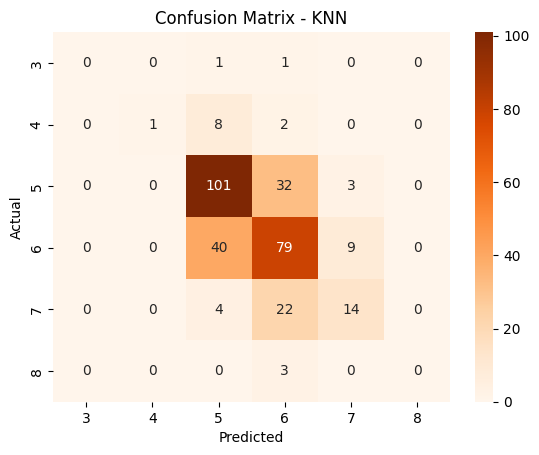

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Definir las mejores caracter√≠sticas seg√∫n RFE
selected_features = ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

# Utilizar solo las caracter√≠sticas seleccionadas
X_selected = X[selected_features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Definir modelo
knn_model = KNeighborsClassifier(n_neighbors=5)

# Validaci√≥n cruzada KNN
cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
print("KNN - Cross-Validation Accuracy Scores:", cv_scores_knn)
print("KNN - Mean Accuracy:", np.mean(cv_scores_knn))
print("KNN - Standard Deviation:", np.std(cv_scores_knn))

# Entrenar modelos con el conjunto de entrenamiento
knn_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_knn = knn_model.predict(X_test)

# Evaluar modelos
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nKNN - Test Set Accuracy:", accuracy_knn)
print("\nKNN - Classification Report:\n", classification_report(y_test, y_pred_knn))

# Matriz de confusi√≥n KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


#### KNN con SMOTE

KNN - Cross-Validation Accuracy Scores: [0.77370031 0.77217125 0.79969419 0.76911315 0.78134557]
KNN - Mean Accuracy: 0.7792048929663609
KNN - Standard Deviation: 0.011009174311926637

KNN - Test Set Accuracy: 0.515625

KNN - Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.16      0.64      0.26        11
           5       0.73      0.57      0.64       136
           6       0.65      0.48      0.55       128
           7       0.35      0.45      0.40        40
           8       0.12      0.67      0.21         3

    accuracy                           0.52       320
   macro avg       0.34      0.47      0.34       320
weighted avg       0.62      0.52      0.55       320



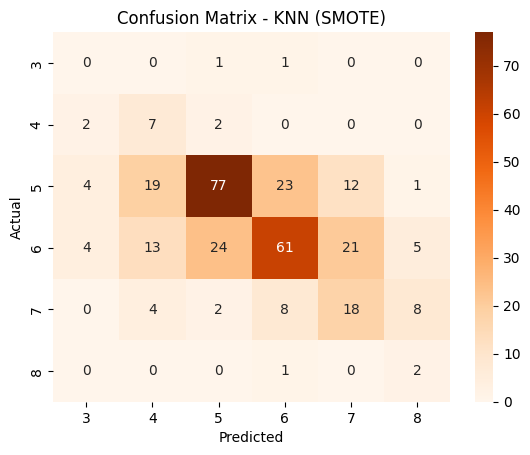

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Definir las mejores caracter√≠sticas seg√∫n RFE
selected_features = ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

# Utilizar solo las caracter√≠sticas seleccionadas
X_selected = X[selected_features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)

# Validaci√≥n cruzada KNN
cv_scores_knn = cross_val_score(knn_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("KNN - Cross-Validation Accuracy Scores:", cv_scores_knn)
print("KNN - Mean Accuracy:", np.mean(cv_scores_knn))
print("KNN - Standard Deviation:", np.std(cv_scores_knn))

# Entrenar modelos con el conjunto de entrenamiento balanceado
knn_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones
y_pred_knn = knn_model.predict(X_test)

# Evaluar modelos
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nKNN - Test Set Accuracy:", accuracy_knn)
print("\nKNN - Classification Report:\n", classification_report(y_test, y_pred_knn))

# Matriz de confusi√≥n KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN (SMOTE)')
plt.show()


Nos quedamos con el modelo KNN con SMOTE

### 5.2. Exportar a un fichero los par√°metros del modelo entrenado.


Diferencias entre los formatos de guardado:

- pkl (joblib.dump) ‚Üí Guarda el modelo completo para reutilizarlo despu√©s (ideal para predicciones futuras).
- csv ‚Üí Guarda solo los par√°metros del modelo en formato legible.

#### PKl

In [25]:
import joblib

# Guardar el modelo KNN entrenado
joblib.dump(knn_model, 'knn_model.pkl')

# Guardar el scaler utilizado para normalizar los datos
joblib.dump(scaler, 'scaler.pkl')

print("Modelo KNN y scaler guardados exitosamente.")

Modelo KNN y scaler guardados exitosamente.


#### CSV

In [26]:
import pandas as pd

# Obtener los par√°metros del modelo KNN
knn_params = knn_model.get_params()

# Convertirlos en un DataFrame y guardarlos en CSV
df_params = pd.DataFrame(list(knn_params.items()), columns=['Parameter', 'Value'])
df_params.to_csv('knn_model_params.csv', index=False)

print("Par√°metros del modelo KNN guardados en 'knn_model_params.csv'")


Par√°metros del modelo KNN guardados en 'knn_model_params.csv'


#### Ver los archivos

Los archivos .pkl y .csv se guardan en el directorio donde ejecutes el script, que en Google Colab es el directorio ra√≠z de tu sesi√≥n temporal (/content/).

In [27]:
import os
print(os.listdir())

['.config', 'scaler.pkl', 'knn_model_params.csv', 'knn_model.pkl', 'dataset_wine', 'sample_data']


### 5.3. Importar los par√°metros del modelo

In [28]:
import joblib

# Cargar el modelo KNN entrenado
knn_model = joblib.load('knn_model.pkl')

# Cargar el scaler utilizado para normalizar los datos
scaler = joblib.load('scaler.pkl')

print("Modelo KNN y scaler cargados exitosamente.")


Modelo KNN y scaler cargados exitosamente.


### 5.4. Aplicar el modelo (predict) a todos los datos del dataset y obtener la matriz de confusi√≥n.


KNN - Accuracy for All Data: 0.6279

KNN - Classification Report (All Data):
               precision    recall  f1-score   support

           3       0.17      0.80      0.28        10
           4       0.21      0.91      0.34        53
           5       0.80      0.62      0.70       681
           6       0.76      0.54      0.63       638
           7       0.57      0.80      0.67       199
           8       0.28      0.94      0.44        18

    accuracy                           0.63      1599
   macro avg       0.47      0.77      0.51      1599
weighted avg       0.73      0.63      0.65      1599



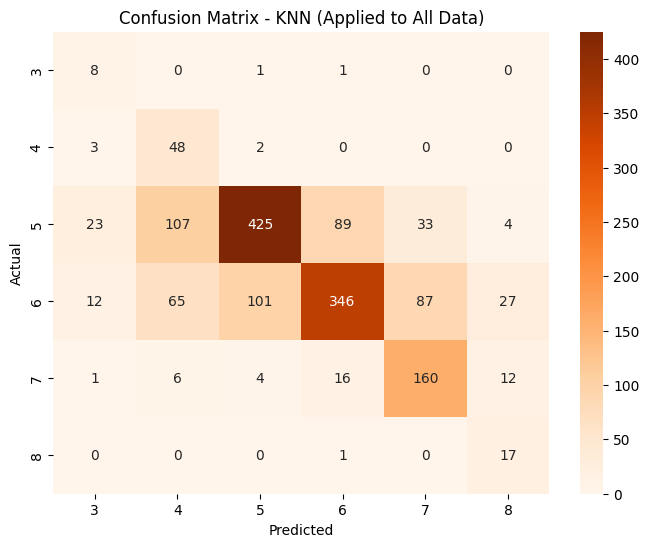


Class 3:
  Precision: 0.1702
  Recall: 0.8000
  F1-score: 0.2807

Class 4:
  Precision: 0.2124
  Recall: 0.9057
  F1-score: 0.3441

Class 5:
  Precision: 0.7974
  Recall: 0.6241
  F1-score: 0.7002

Class 6:
  Precision: 0.7638
  Recall: 0.5423
  F1-score: 0.6343

Class 7:
  Precision: 0.5714
  Recall: 0.8040
  F1-score: 0.6681

Class 8:
  Precision: 0.2833
  Recall: 0.9444
  F1-score: 0.4359


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Realizar predicciones sobre todo el dataset
y_pred_all = knn_model.predict(X_selected_scaled)

# Evaluar el accuracy
accuracy_all = accuracy_score(y, y_pred_all)
print(f"\nKNN - Accuracy for All Data: {accuracy_all:.4f}")

# Obtener el reporte de clasificaci√≥n completo
class_report_all = classification_report(y, y_pred_all)
print("\nKNN - Classification Report (All Data):\n", class_report_all)

# Calcular la matriz de confusi√≥n
conf_matrix_all = confusion_matrix(y, y_pred_all)

# Mostrar la matriz de confusi√≥n utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_all, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN (Applied to All Data)')
plt.show()

# Calcular m√©tricas adicionales
# Precision, Recall, F1-score para cada clase
precision_all = np.diagonal(conf_matrix_all) / np.sum(conf_matrix_all, axis=0)
recall_all = np.diagonal(conf_matrix_all) / np.sum(conf_matrix_all, axis=1)
f1_all = 2 * (precision_all * recall_all) / (precision_all + recall_all)

# Mostrar m√©tricas de precisi√≥n, recall y F1-score por clase
for label, precision, recall, f1 in zip(np.unique(y), precision_all, recall_all, f1_all):
    print(f"\nClass {label}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")


## 6. Comparar el resultado obtenido con el valor de calidad indicado en el dataset por medio de una matriz de confusi√≥n

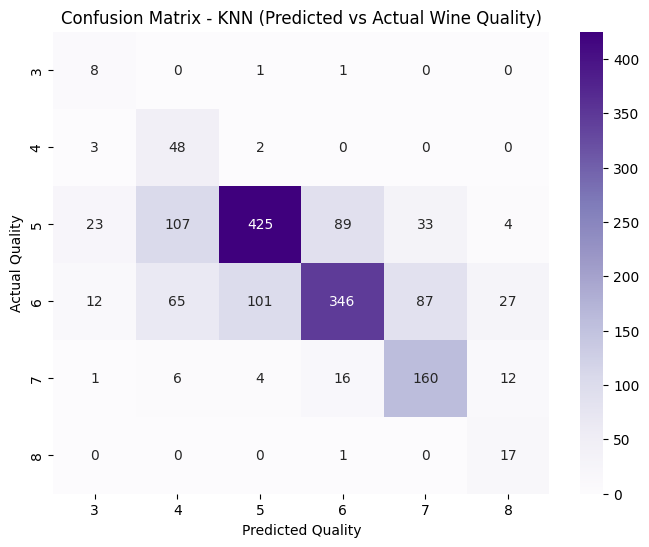


KNN - Classification Report (Comparison with Actual Quality):
               precision    recall  f1-score   support

           3       0.17      0.80      0.28        10
           4       0.21      0.91      0.34        53
           5       0.80      0.62      0.70       681
           6       0.76      0.54      0.63       638
           7       0.57      0.80      0.67       199
           8       0.28      0.94      0.44        18

    accuracy                           0.63      1599
   macro avg       0.47      0.77      0.51      1599
weighted avg       0.73      0.63      0.65      1599



In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de confusi√≥n entre las predicciones y los valores reales
conf_matrix_quality = confusion_matrix(y, y_pred_all)

# Visualizar la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_quality, annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix - KNN (Predicted vs Actual Wine Quality)')
plt.show()

# Mostrar tambi√©n el reporte de clasificaci√≥n para mayor contexto
print("\nKNN - Classification Report (Comparison with Actual Quality):\n", classification_report(y, y_pred_all))


 - Matriz de Confusi√≥n: Compara las etiquetas predichas (y_pred_all) con las etiquetas reales (y), mostrando cu√°ntas veces el modelo predijo correctamente o incorrectamente cada clase de calidad.
 - Visualizaci√≥n: Utilizamos un gr√°fico de calor con seaborn para mostrar la matriz de confusi√≥n.
 - Reporte de Clasificaci√≥n: Tambi√©n mostramos el reporte de clasificaci√≥n, que proporciona detalles sobre las m√©tricas de rendimiento (precisi√≥n, recall, F1-score) para cada clase de calidad.


1. Clasificaci√≥n de Calidad del Vino:

    El modelo ha predicho las calidades de vino (clases 3 a 8) con distintas m√©tricas de precisi√≥n, recall y F1-score.

    Para cada clase:
  - Precisi√≥n (Precision): Es la proporci√≥n de predicciones correctas para cada clase en relaci√≥n con el total de predicciones de esa clase. Por ejemplo, para la clase 3, la precisi√≥n es 0.17, lo que significa que solo el 17% de las veces que el modelo predijo la clase 3, estaba en lo correcto.

  - Recall: Es la proporci√≥n de verdaderos positivos con respecto al total de elementos reales de esa clase. Por ejemplo, para la clase 3, el recall es 0.80, lo que significa que el 80% de las veces que la clase 3 estuvo presente, el modelo la identific√≥ correctamente.

  - F1-Score: Es la media arm√≥nica entre precisi√≥n y recall. Ofrece un equilibrio entre ambos. Para la clase 3, el F1-score es 0.28, que refleja un rendimiento relativamente bajo en cuanto a balancear precisi√≥n y recall.

  Resultados generales:
  - Accuracy (Precisi√≥n Global): La precisi√≥n global del modelo es 0.63 o 63%, lo que indica que el modelo acierta el 63% de las veces en todo el conjunto de datos.

  - Macro Average: Es un promedio sin ponderaci√≥n, que calcula la precisi√≥n, recall y F1-score para cada clase sin tener en cuenta el n√∫mero de ejemplos por clase. En tu caso, la precisi√≥n promedio es 0.47, el recall promedio es 0.77, y el F1-score promedio es 0.51.

  - Weighted Average: Es un promedio ponderado por la cantidad de muestras en cada clase. Aqu√≠, la precisi√≥n ponderada es 0.73, el recall ponderado es 0.63, y el F1-score ponderado es 0.65. Estos valores reflejan un rendimiento m√°s realista considerando que algunas clases (como la clase 5) tienen m√°s muestras que otras.

2. An√°lisis de Resultados:

    - Clases con buen desempe√±o: Las clases con un buen desempe√±o incluyen las de calidad 5, 6 y 7, donde la precisi√≥n y recall son relativamente altas. Por ejemplo:

     - Clase 5: Tiene una precisi√≥n de 0.80, un recall de 0.62, y un F1-score de 0.70, lo que indica que el modelo est√° acertando en una proporci√≥n significativa de los casos y que su desempe√±o es s√≥lido para esta clase.

     - Clase 6: Tiene una precisi√≥n de 0.76 y un recall de 0.54, lo que significa que el modelo est√° mejor en la identificaci√≥n de esta clase, aunque tiene algunas dificultades para cubrir todos los casos posibles.

    - Clases con bajo desempe√±o: Algunas clases, como la clase 3, presentan bajo desempe√±o en t√©rminos de precisi√≥n y F1-score:

     - Clase 3: Tiene una precisi√≥n de 0.17 y un F1-score de 0.28, lo que refleja que el modelo tiene dificultades para predecir correctamente esta clase, a pesar de que el recall es relativamente alto.
3. Conclusiones:

    El modelo muestra un buen desempe√±o en clases con m√°s frecuencia (como las clases 5 y 6), pero tiene dificultades para predecir correctamente las clases menos representadas, como la clase 3. Esto es com√∫n cuando los datos est√°n desbalanceados.

    La precisi√≥n global de 0.63 es aceptable, pero el modelo podr√≠a beneficiarse de un enfoque de mejora en la predicci√≥n de clases minoritarias o de un mejor manejo de clases desbalanceadas. M√©todos como SMOTE (que ya aplicamos) y ajustes de los par√°metros de KNN pueden ayudar a mejorar este desequilibrio.

### 6.1. Obtener la precisi√≥n del resultado obtenido, para determinar si coincide con la precisi√≥n que se calcul√≥ durante el entrenamiento

In [38]:
from sklearn.metrics import accuracy_score

# Obtener la precisi√≥n del modelo para todo el conjunto de datos
accuracy_all_data = accuracy_score(y, y_pred_all)

# Mostrar la precisi√≥n obtenida en todo el conjunto de datos
print(f"KNN - Accuracy for All Data: {accuracy_all_data:.4f}")

# Comparar con la precisi√≥n obtenida en la validaci√≥n cruzada durante el entrenamiento
# Utilizamos la media de las precisiones obtenidas durante la validaci√≥n cruzada
mean_cv_accuracy = np.mean(cv_scores_knn)

# Mostrar la precisi√≥n obtenida durante la validaci√≥n cruzada
print(f"KNN - Mean Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")

# Comparar si la precisi√≥n obtenida en el conjunto completo es similar a la de la validaci√≥n cruzada
if np.isclose(accuracy_all_data, mean_cv_accuracy, atol=0.05):
    print("La precisi√≥n obtenida en el conjunto completo es consistente con la precisi√≥n de la validaci√≥n cruzada.")
else:
    print("La precisi√≥n obtenida en el conjunto completo difiere de la precisi√≥n de la validaci√≥n cruzada.")


KNN - Accuracy for All Data: 0.6279
KNN - Mean Cross-Validation Accuracy: 0.7792
La precisi√≥n obtenida en el conjunto completo difiere de la precisi√≥n de la validaci√≥n cruzada.


## 7. Probar a utilizar el cuaderno con el dataset de los vinos blancos y realizar captura de los resultados obtenidos. (utilizar el dataset winequality-white.csv)
